# Modelowanie - warsztaty, zajęcia 04

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
print("wersja seaborn'a:\n", sns.__version__)

wersja seaborn'a:
 0.8.1


In [2]:
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')

## Uczenie maszynowe
W uczeniu maszynowym interesuje nas bardziej przewidywanie niż zrozumienie zależności w danych.
Wyobraźmy sobie że zastanawiamy się nad podróżą Tytanikiem II - zanim zdecydujemy się na podróż chcielibyśmy wiedzieć, czy mamy szanse ją przeżyć. Ważniejsze jest dla nas aby trafnie przewidzieć nasze szanse przeżycia, nawet kosztem zrozumienia dlaczego model, z którego korzystamy zwraca określone przewidywanie. Dlatego w uczeniu maszynowym często korzysta się z dużo bardziej złożonych modeli niż w klasycznej statystyce i nie opisuje efektów pod kątem ich istotności, ale poprawności naszych predykcji.  
Najczęściej w uczeniu maszynowym symulujemy predykcję poprzez podzielenie danych na dwa zbiory - treningowy oraz testowy.
**Zbiór treningowy** to dane, z których korzystamy aby dopasować nasz model. **Ziór testowy** to dane, dla których sprawdzamy jak trafne są nasze predykcje. Podziału na zbiór testowy i treningowy dokonujemy losowo, przy czym zwykle chcemy aby zbiór treningowy był większy - aby mieć wystarczająco danych by dobrze dopasować model. Wielkość zbioru testowego ogranicza tylko rozdzielczość z jaką będziemy mierzyć poprawność predykcji (np. 10 przypadków w zbiorze testowym oznacza, że rozdzielczość z jaką będziemy szcować poprawność to 1/10 tzn. 10%).  
Najpopularniejszym pakietem do uczenia maszynowego (z pominięciem złożonych sieci neuronowych) jest `scikit-learn`, w skrócie `sklearn`. Pakiet ten ma bardzo bogatą [dokumnetację](http://scikit-learn.org/stable/index.html).
Najpierw wczytamy tylko funkcję do dzielenia danych na dane testowe i treningowe oraz model z którego będziemy korzystać - regresję logistyczną:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Przekształcanie danych
Podstawowa różnica między `statsmodels` a `sklearn` jest taka, że `sklearn` korzysta z macierzy, a nie dataframe'ów, dlatego w ostatnim kroku preprocessingu zamienimy nasz dataframe na macierz. Wcześniej będziemy musieli zamienić kolumny zawierające dane kategorialne (takie jak np. `who`) na zmienne dychotomiczne. Kolumna `who` ma np. trzy kategorie - zamienimy ją w związku z tym w dwie kolumny zero-jedynkowe (dychotomiczne) (nie potrzebujemy aż trzech kolumn w tym wypadku - trzecia niosła by redundantne informacje względem dwóch poprzednich). Do zamiany kolumn kategorialnych na dychotomiczne użyjemy funkcji `pd.get_dummies`.  
  
Przypomnijmy sobie najpierw jak wyglądają nasze dane:

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Najpierw weźmy kolumny ilościowe: pclass (klasa biletu), age (wiek), sibsp (liczba rodzeństwa bądź małżonków na pokładzie) parch (liczba rodziców / dzieci na pokładzie), fare (opłata):

In [28]:
columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']
titanic_selected = titanic.loc[:, columns]
titanic_selected.head(6)

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
5,3,NaN,0,0,8.4583


możecie przy okazji zwrócić uwagę powyżej na wartość w drugiej kolumnie, ostatnim wierszu: `NaN` (od *Not a Number*) - to brak danych. Z brakami poradzimy sobie później.  
W następnej kolejności zobaczmy jak możemy zająć kolumnami ze zmiennymi kategorycznymi. Zajmijmy się najpierw płcią: kolumna `sex`. Korzystamy z `pd.get_dummies` podając kolumnę sex oraz używamy `drop_first=True` aby dostać o jedną kolumnę mniej niż liczba kategorii (aby uniknąć nadmiarowych informacjii):

In [29]:
sx = pd.get_dummies(titanic.sex, drop_first=True)
sx[:6]

,male
0,1
1,0
2,0
3,0
4,1
5,1


Możemy skorzystać z `pd.get_dummies()` aby za jednym zamachem wyciągnąć z dataframe'u kilka zmiennych kategorycznych i przekodować je na zmienne przyjazne dla regresji (możesz się na ten temat dowiedzieć nieco więcej szukając w google po haśle 'dummy coding', możesz też zadać mi pytanie na zajęciach).  
### Ćwiczenie
Chcemy wybrać kolumny `sex`, `alone` oraz `who` za pomocą `pd.get_dummies`, uzupełnij odpowiednio argument `columns=` (wrazie problemów sprawdź w sieci dokumentację `pd.get_dummies` dla argumentu `columns`):

In [95]:
titanic_with_dummies = pd.get_dummies(titanic, columns=_______________, drop_first=True)
titanic_with_dummies.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,sex_male,alone_True,who_man,who_woman
0,0,3,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,1,0,1,0
1,1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,0,0,0,1
2,1,3,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,1,1,1,0


Niestety `pd.get_dummies()` zwraca nam cały oryginalny dataframe z doklejonymi nowymi kolumnami przedstawiającymi dodane zmienne podczas gdy my chcemy tylko te przekształcone. Z tego względu po wykorzystaniu `get_dummies` wybieramy same przekształcone kolumny z użyciem metody `.loc`
### Ćwiczenie
Skorzystaj z metody `.loc` dataframe'u `titanic_with_dummies` wybierając wszystkie wiersze i wszystkie kolumny zaczynając od `sex_male`. Zapisz uzyskany w ten sposób dataframe w zmiennej `titanic_only_dummies`.

In [96]:
________________ = ____________.loc[_, ________:]
titanic_only_dummies.head()

,sex_male,alone_True,who_man,who_woman
0,1,0,1,0
1,0,0,0,1
2,0,1,0,1
3,0,0,0,1
4,1,1,1,0


Możemy teraz skleić dwa dataframe'y (`titanic_selected` oraz `titanic_only_dummies`) za pomocą funkcji `pd.concat()`. Nazwa tej funkcji pochodzi od *concatenate* tzn. łączyć, składać. Używamy argumentu nazwowego `axis=1` aby skleić dataframe'y w osi kolumn (oś pierwsza tzn. `axis=0` to wiersze, oś druga tzn. `axis=1` to kolumny).

In [31]:
titanic_preproc = pd.concat([titanic_selected, titanic_only_dummies], axis=1)
titanic_preproc.head()

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,1,0


Reszta kolumn nie będzie nas interesować (przynajmniej na razie).  
Pozostaje nam jeszcze pozbyć się brakujących wartości. Najprostsze rzeczy jakie możemy zrobić to:  
* wyrzucić wszystkie wiersze, w których są jakiekolwiek brakujące dane
* brakujące w danej kolumnie dane zastąpić średnią z tej kolumny

### Ćwiczenie
Wykorzystamy tę drugą metodę. Najpier użyjemy metody `.mean()` dataframe'u aby uzyskać średnią z każdej kolumny, a następnie skorzystamy z `.fillna()` - metody, która umożliwia zastępowanie braków danych wybranymi wartościami. Metodzie `fillna` podamy uzyskane średnie.

In [32]:
średnie = titanic_preproc.____()
średnie

pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
sex_male       0.647587
alone_True     0.602694
who_man        0.602694
who_woman      0.304153
dtype: float64

In [33]:
titanic_preproc = titanic_preproc.fillna(______)

To już koniec przekształceń! Możemy nagrodzić się obrazkiem fragmentu naszych danych.
(w przykładzize poniżej korzystamy z `.values` aby dostać się do macierzy danych, porzucając skorupkę dataframe'u tzn. nazwy kolumn i wierszy; korzystamy też z funkcji `zscore` aby wystandaryzować kolumny (tzn wykonać standaryzację "wzdłuż wierszy" `axis=0`):

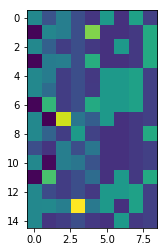

In [24]:
from scipy.stats import zscore

data = titanic_preproc.values[:15, :]
data = zscore(data, axis=0)
plt.imshow(data, cmap='viridis')

### Dzielenie na dane treningowe i testowe

Interesuje nas przewidywanie przeżycia tzn. kolumny `survived`, zapiszemy ją sobie w formacie numpy w zmiennej `y`.
### Ćwiczenie
zapisz wartości kolumny `survived` w zmiennej `y`. Pamiętaj aby dostać się do parametru `.values` danej kolumny - w ten sposób wyciągniesz dane bez opisu kolumn i wierszy tzn. zwykła macierz numpy.

In [34]:
y = titanic.________._____

Dzielimy nasze dane (`titanic_preproc`) i zmienną zależną (`y`) na zbiór testowy i treningowy. Chcemy aby zbiór testowy wynosił 30% treningowego, dodatkowo podajemy `random_state` aby losowanie było takie same nawet jak uruchomimy ten notebook ponownie (a także między różnymi komputerami).
### Ćwiczenie
Uzupełnij brakujące pola. Pamiętaj, że `titanic_preproc` to dataframe, a do `train_test_split` chcemy podać macierz.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(titanic_preproc.______, y, test_size=___, random_state=42)

Najpierw zobaczmy jak nam idzie przewidywanie dla dwóch zmiennych, z których korzystaliśmy wcześniej budując model statystyczny: `pclass` oraz `who_man`. Przypomnijmy sobie, które są to kolumny w naszej macierzy (wiemy o tym ponieważ tworzyliśmy na bieżąco listę nazw kolumn `columns`):

In [27]:
print(titanic_preproc.columns)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'alone_True',
       'who_man', 'who_woman'],
      dtype='object')


Pierwsza oraz przedostatnia kolumna - wybierzemy je teraz zarówno dla danych treningowych jak i testowych:

In [28]:
xtr = X_train[:, [0, -2]]
xts = X_test[:, [0, -2]]

### Przewidujemy (na razie z użyciem dwóch zmiennych)

Korztystamy z regresji logistycznej (wcześniej wczytanej funkcji `LogisticRegression`) - najpierw tworzymy klasyfikator (regresję logistyczną):

In [29]:
logistic_model = LogisticRegression()

Teraz korzystamy z metody `.fit()` klasyfikatora aby dopasować go do danych treningowych:
* `xtr`, macierzy zawierającej dwie kolumny z `data_matrix`
* `y_train` informacji o przeżyciu pasażera (odpowiadających kolejnym wierszom z `data_matrix`)

In [30]:
logistic_model.___(xtr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Możemy następnie wygenerować przewidywania dla danych testowych (`xts`) korzystając z metody `.predict`:

In [31]:
predictions = logistic_model._______(xts)

In [32]:
predictions[:8]

array([0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

Przewidywania to po prostu zera i jedynki odpowiadające ocenie nie przeżyje (0) oraz przeżyje (1). Możemy je teraz porównać z faktycznym losem pasażerów znajdujących się w zbiorze testowym (`y_test`). Porównujemy `predictions` z `y_test` z użyciem identyczności (`==`), co daje nam listę (a konkretnie wektor) zer i jedynek - zera gdzie predykcja nie zgadza się z faktycznym losem, jeden gdzie predykcja jest trafna. Uśrednienie tej listy daje nam średnią poprawność predykcji naszego modelu:

In [33]:
poprawność = (predictions == y_test).mean()
print('Poprawność przewidywania naszego modelu to:', poprawność)

Poprawność przewidywania naszego modelu to: 0.7947761194029851


79% to całkiem nieźle, to prawie 80% poprawności przewidywań w oparciu tylko o dwie zmienne. Zanim przejdziemy dalej, spróbujemy zrozumieć lepiej co robi regresja logistyczne w oparciu o te dwie zmienne. W tym celu narysujemy sobie na jednym wykresie punkty odpowiadające pasażerom (kolorami oznaczając czy przeżyli). Oś x tego wykresu to będzie klasa biletu, natomiast oś y reprezentować będzie czy pasażer jest mężczyzną (nie-dzieckiem, przy czym nie mówimy tu o stanie umysłu):
<div class="alert alert-danger">
Uwaga!  
Kod pojawiający się poniżej przygotowujący wykresy może być dla Was czarną magią, nie musicie go zupełnie rozumieć. Ważne jest tylko zrozumienie _wykresu_.
</div>

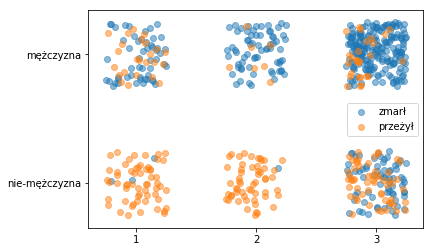

In [34]:
alive = y_train == 1
x = xtr + np.random.rand(*xtr.shape) * 0.5 - 0.25

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='zmarł')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='przeżył')

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['nie-mężczyzna', 'mężczyzna'])
plt.legend(loc='best')

Zwróćcie uwagę, że punkty są rozproszone dla czytelności, faktycznie każdy punkt zajmuje tylko jedną z sześciu pozycji (3 na osi x * 2 na osi y).  
Regresja logistyczna dzieli nam tę dwu-wymiarową przestrzeń prostą linią tak aby jak najlepiej rozseparować żywych od matrwych.

Text(0,0.5,'Prawdopodobieństwo przeżycia')

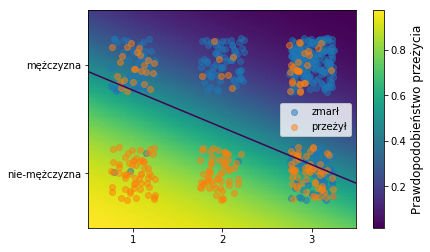

In [36]:
xx = np.linspace(0.5, 3.5, 100)
yy = np.linspace(-0.5, 1.5, 100).T
xx, yy = np.meshgrid(xx, yy)
full_grid = np.c_[xx.ravel(), yy.ravel()]

prob = logistic_model.predict_proba(full_grid)[:, 1].reshape((100, 100))

img = plt.imshow(prob, extent=[0.5, 3.5, -0.5, 1.5], origin='lower', cmap='viridis', aspect='auto')

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='zmarł')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='przeżył')

plt.contour(xx, yy, prob, levels=[0.5])

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['nie-mężczyzna', 'mężczyzna'])
plt.legend(loc='best', frameon=True, fancybox=True)
plt.grid('off')
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Prawdopodobieństwo przeżycia', fontsize=12)

Widzimy, że regresja logistyczna przyporządkowuje punktom w powyższej, dwuwymiarowej przestrzeni, prawdopodobieństwo należenia do klasy "przeżył" - zaznaczone kolorem. Czarna linia to linia decyzyjna regresji logistycznej - powyżej tej linii prawdopodobieństwo przeżycia wynosi mniej niż 50%, poniżej - więcej niż 50%. Linia ta układa się w taki sposób, że sugeruje, że nasz sukces w przewidywaniu (poprawność 79%) wynika tylko z wykorzystania zmiennej `who_man`. 
### Ćwiczenie
Możesz to sprawdzić dopasowując model korzystający tylko z jednej zmiennej:

In [129]:
xtrain = X_train[:, [-2]]
xtest = X_test[:, [-2]]

logistic_model.___(xtrain, y_train)
predictions = logistic_model.______(xtest)

poprawność = (__________ == y_test).____()
print('Poprawność przewidywania naszego modelu to:', _________)

Poprawność przewidywania naszego modelu to: 0.7947761194029851


### Korzystamy ze wszystkich zmiennych:

Gdy chcemy skorzystać ze wszystkich zmiennych dobrze jest:
* poradzić sobie z brakami danych
* wystandaryzować zmienne

Z brakami danych uporaliśmy się już wcześniej.

#### Standaryzacja
Korzystamy ze `StandardScaler` i jego metody `.fit_transform()` za pomocą której szybko dokonujemy standaryzacji każdej zmiennej (kolumny) w macierzy treningowej i testowej.

In [39]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

logistic_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Ćwiczenie
Utwórz funkcję `show_correctness` która przyjmuje: 
* dopasowany model
* dane testowe (`X_test` oraz `y_test`)

i wyświetla poprawność.

In [ ]:
# tutaj utwórz funkcję

In [41]:
# a tutaj sprawdź czy dobrze działa
show_correctness(logistic_model, X_test, y_tetst)

Poprawność przewidywania naszego modelu to: 0.8171641791044776


Tylko nieco lepiej niż w sytuacji naszej jednej zmiennej - 81.7%.
Poprawić ten wynik moglibyśmy:
* dostosowując hiperparametry naszego klasyfikatora (regresji logistycznej)
* tworząc nowe zmienne (predyktory) np. obrazujące interakcję między niektórymi zmiennymi
* albo używając innego klasyfikatora (np. sieci neuronowej, która potrafi sama utworzyć sobie nowe predyktory np. interakcje z danych)  

W przypadku danych `titanic` stosując regresję logistyczną nie uda nam się osiągnąć wyższej poprawności niż `81.7%`, spróbujemy w związku z tym innego klasyfikatora - maszyny wektorów nośnych, *support vector machine* (SVM). W naszym wypadku problem dotyczy klasyfikacji w związku z czym mamy do czynienia z *support vector classifier* (SVC).

In [15]:
from sklearn.svm import SVC

Aby przedstawić Wam podstawową różnicę między regresją logistyczną a SVM, wygenerujemy prosty dataset, którego nie da się rozdzielić dobrze jedną linią:

(-2, 3.2)

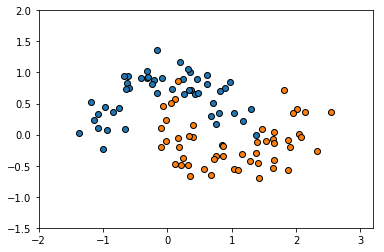

In [19]:
from sklearn.datasets import make_moons
from emosie import plot_decision

# tworzymy data_moon - punkty w 2d (macierz o wymiarach (ilość_punktów, 2))
# data_moon reprezentuje zmienne za pomocą,k tórych przewidujemy - X
# oraz classes_moon - to informacja o klasie do której należy każdy z punktów,
# tzn. informacje, które chcemy przewidywać (y)
data_moon, classes_moon = make_moons(noise=0.2, random_state=42)

# wyświetlamy punkty i ustawiamy zakres osi
plot_decision(data_moon, classes_moon)
plt.ylim((-1.5, 2))
plt.xlim((-2, 3.2))

### Ćwiczenie
Najpierw dopasuj do tych danych regresję logistyczną. Nie przejmuj się podziałem na zbiór testowy i treningowy, nie jest to nam potrzebne by zademonstrować różnice między regresją logistyczną i SVC:

In [116]:
# tutaj ćwiczenie - dopasuj regresję logistyczną
lgr = _________________()
___.___(_________, ___________)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Gdy już dopasujesz regresję logistyczną użyj kodu poniżej aby zobaczyć jak dzieli ona wygenerowane dane na dwie grupy i jaką ma poprawność:

In [12]:
lgr=LogisticRegression()
lgr.fit(data_moon, classes_moon)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
plot_decision(data_moon, classes_moon, clf=___)

### Ćwiczenie
Teraz utwórz i dopasuj do danych SVC (logika jest ta sama co w przypadku regresji logistycznej). W ostatniej linijce wyświetl rezultaty dopasowania.

In [ ]:
svc = SVC()
___.fit(_______, _________)
plot_decision(________, ________, clf=___)

## Zabawa hiperparametrami
Algorytmy klasyfikacyjne używane w uczeniu maszynowym mają parametry, które są dopasowywane w oparciu o dane tak aby jak najlepiej odseparować od siebie klasy (przypomnijcie sobie przykład parametrów funkcji logistycznej z zajęć). Algorytmy te mają też tzw. **hiperparametry** czyli parametry, które nie są dopasowywane w oparciu o dane (których algorytm nie potrafi się nauczyć z danych). W przypadku SVC te parametry to `C` (regularyzacja czyli w tym wypadku koszt jaki algorytm płaci za skupianie się na wielu pojedynczych punktach), `gamma` (wpływa na kształt dopasowywanej funkcji - im niższa wartość tym kształt jest gładszy). Aby lepiej zrozumieć te parametry poniżej wyświetlicie sobie rezultaty klasyfikacji naszego małego datasetu z użyciem różnych ich wartości. 
### Ćwiczenie
Zacznijmy od parametru `gamma`, stwórz poniżej klasyfikator SVC ustawiając parametr `gamma` na `1.5`. Następnie wyświetl rezultaty dopasowania.

In [ ]:
___ = SVC(gamma=___)
___.___(________, ________)
plot_decision(________, __________, clf=___)

Zobacz teraz co się stanie gdy ustawisz parametr gamma na wyższe wartości np. `5` a następnie `25`. A teraz zobacz jak zachowuje się SVC gdy `gamma` wynosi `0.1` albo `0.01`.  
Jak myślisz, które ustawienie tego parametru jest najlepsze pod kątem predykcji - tzn. nie pod względem poprawności dopasowania do danych treningowych, ale poprawnej klasyfikacji nowych danych (nie zupełnie nowych w znaczeniu innych np. opisujących inne zajwisko, ale danych pochodzących z tego samego rozkładu ale wcześniej nie obserwowanych).

In [ ]:
___ = SVC(gamma=___)
___.___(________, ________)
plot_decision(________, __________, clf=___)

### Ćwiczenie
Teraz zobaczmy jak zachowuje się parametr `C`. Ustawmy parametr gamma na razie na `0.5` i sprawdźmy różne wartości parametru `C`. Stwórz dwa klasyfikatory, pierwszy z wartością `C` równą `0.5` a drugi z `C` równym `10.`.

In [ ]:
svc1 = ___(gamma=___, C=___)
svc2 = ___(gamma=___, C=___)

# dodatkowy kod aby były dwa oddzielne panele na wykresie
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(ax[0])

# dopasuje i wyświetl PIERWSZY klasyfikator
___.___(________, ________)
plot_decision(________, __________, clf=___)

# ustawiamy teraz drugi panel jako aktywny
plt.sca(ax[1])

# dopasuje i wyświetl DRUGI klasyfikator
___.___(________, ________)
plot_decision(________, __________, clf=___)

Teraz ustaw `C` klasyfikatora na lewym wykresie na `0.1` a tego po prawej stronie `1000.`. Zmień kod powyżej albo skopiuj i zmień w komórce poniżej. Sprawdź jeszcze ustawienie z wysokim `C` i wyższym `gamma` np. `C=1000., gamma=3.5`.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'anitaliasing'
  s)
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  s)


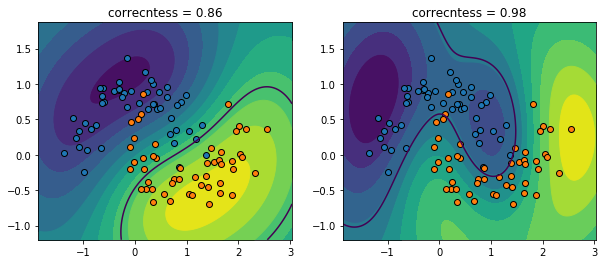

In [27]:
#

## Wracamy do tytanika
Rozumiemy już mniej więcej czym charakteryzują się parametry `C` oraz `gamma`, wiemy że algorytm nie dopsowuje ich samodzielnie, ale trzeba mu je podać. Spróbujmy teraz:
* dopasować do danych testowych tytanika dopasować SVC z domyślnymi parametrami i na danych testowych sprawdzić poprawność klasyfikacji
* zmienić parametry `C` oraz `gamma` tak aby zwiększyć poprawność na danych testowych (podpowiedź - najlepiej będą działać wysokie wartości `C` oraz bardzo niskie wartości `gamma` (poniżej `0.0001`).  

Czy jesteś w stanie wydusić poprawność powyżej 80% z wykorzystaniem SVC?

In [ ]:
svc = SVC()
___.___(X_train, ______)
_________ = ___._______(_____)

poprawność = (___________ == ______).____()
print('Poprawność przewidywania naszego modelu to:', poprawność)

Zamiast sprawdzać parametry ręcznie możemy usprawnić proces na dwa sposoby:
* sprawdzać automatycznie wszystkie kombinacje wybranych hiperparametrów
* sprawdzać hiperparametry w trybie k-fold (np. 5-fold) na danych treningowych i dopiero po wybraniu hiperparametrów sprawdzać poprawność na danych testowych. W innym wypadku trochę oszukujemy - sprawdzamy wiele różnych parametrów pod kątem tego jak dobrze sprawdzają się na danych testowych a później mówimy "o, proszę, co za nispodzianka, klasyfikator działa dobrze dla danych testowych!". To problem porównywalny do *wielokrotnych porównań* w statystyce.

Utwórzmy najpierw słownik `parametry`, który zawiera wszystkie parametry dla `gamma` oraz `C`, które chcemy sprawdzić:

In [85]:
parametry = {'gamma': [0.01, 1e-3, 2e-4, 1e-4, 1e-5],
             'C': [1, 10, 100, 1000]}

Następnie wykorzystamy `GridSearchCV` aby przetestować wszystkie pary opisanych wyżej parametrów w trybie 5-fold na danych treningowych. Dopiero wtedy sprawdzimy jak klasyfikator sobie radzi na danych testowych.

In [86]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(), parametry, cv=5)

### Ćwiczenie
`GridSearchCV` zwraca nam obiekt, który zachowuje się ja klasyfikator: ma metodę `.fit()`, z której musisz skorzystać poniżej aby dopasować klasyfikator do danych treningowych:

In [ ]:
clf.___(______, _______)

Możemy teraz sprawdzić jakie parametry okazały się najlepsze:

In [88]:
clf.best_params_

{'C': 1000, 'gamma': 0.0001}

Ok, a ile wyniosła poprawność uśredniona po wszysktkich "foldach"?

In [91]:
clf.best_score_

0.812199036918138

Możemy też sprawdzić jak poradziły sobie wszystkie testowane klasyfikatory (każdy to unikatowe zestawienie `gamma` oraz `C`):

In [92]:
clf.cv_results_['mean_test_score']

array([0.71589085, 0.69020867, 0.66613162, 0.66773676, 0.64847512,
       0.75922953, 0.76886035, 0.70304976, 0.68860353, 0.66773676,
       0.74638844, 0.78812199, 0.79935795, 0.80417335, 0.68860353,
       0.73033708, 0.78009631, 0.80096308, 0.81219904, 0.80898876])

### Ćwiczenie
Wykorzystaj `clf` aby sprawdzić poprawność na danych testowych. Kod będzie wyglądał tak samo jak wcześniej, upewnij się tylko aby dobrze nazwyć klasyfikator (teraz znajduje się w zmiennej `clf`):

Chociaż użyliśmy bardziej skomplikowanego klasyfikatora, nie udało nam się osiągnąć wyższej poprawności niż z użyciem stosunkowo prostej regresji logistycznej. Czasami zależności obecne w danych nie są na tyle złożone aby potrzeba było korzystać ze złożonych algorytmów. Warto o tym pamiętać gdy zaczniemy się bawić sieciami neuronowymi :)